In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


## 1. 数据的读取与展示

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[ :5000], x_train_all[5000: ]
y_valid, y_train = y_train_all[ :5000], y_train_all[5000: ]

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


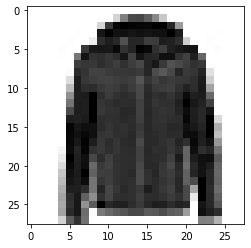

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

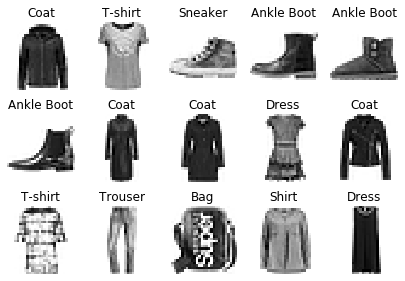

In [4]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)      #subplot索引从1开始
            plt.imshow(x_data[index], cmap="binary",
                      interpolation = "nearest") # interpolation参数控制缩放位置
            plt.axis("off")                          # 关闭坐标轴
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ["T-shirt", "Trouser", "Pullover", "Dress",
               "Coat", "Sandal", "Shirt", "Sneaker", 
               "Bag", "Ankle Boot"]
show_imgs(3, 5, x_train, y_train, class_names)

## 2. 模型构建

### 2.1 构建架构

In [5]:
# tf.keras.models.Sequential()
#书写方式（1）
"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))        # 展平数据
model.add(keras.layers.Dense(300, activation="relu"))        # 添加全连接层
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""
#书写方式（2）
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# reason for spare:  y->index.   y->one_hot->[ ] 将索引转换为热独向量
# 如果已经是热独形式，则用categorical_crossentropy函数
model.compile(loss="sparse_categorical_crossentropy",      
              optimizer ="Adam",             # 使用sgd时会出现Nan的情况
              metrics = ["accuracy"])                 # 关心的参数

### 2.2 查看模型架构

In [6]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 3. 训练模型

In [8]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_valid, y_valid))   
# 每个epoch遍历之后都会使用一次验证集验证准确度

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 69us/sample - loss: 2.3817 - accuracy: 0.7680 - val_loss: 0.6572 - val_accuracy: 0.8054
Epoch 2/10
55000/55000 [==============================] - 3s 60us/sample - loss: 0.5091 - accuracy: 0.8301 - val_loss: 0.5370 - val_accuracy: 0.8140
Epoch 3/10
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4658 - accuracy: 0.8379 - val_loss: 0.4373 - val_accuracy: 0.8510
Epoch 4/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4258 - accuracy: 0.8488 - val_loss: 0.4229 - val_accuracy: 0.8522
Epoch 5/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.4016 - accuracy: 0.8557 - val_loss: 0.4179 - val_accuracy: 0.8468
Epoch 6/10
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3865 - accuracy: 0.8615 - val_loss: 0.4387 - val_accuracy: 0.8474
Epoch 7/10
55000/55000 [==============================] -

## 4. 查看训练历史

In [9]:
type(history)

tensorflow.python.keras.callbacks.History

In [10]:
history.history

{'loss': [2.3816826475750315,
  0.5090754871888594,
  0.46578384902477266,
  0.42584292838573456,
  0.4016083427602595,
  0.38646451972614637,
  0.3772706609921022,
  0.36820413702617993,
  0.3611630673224276,
  0.3472198837193576],
 'accuracy': [0.768,
  0.8300545,
  0.8379091,
  0.84883636,
  0.8557091,
  0.86145455,
  0.86536366,
  0.8683818,
  0.87085456,
  0.87514544],
 'val_loss': [0.6571653542876243,
  0.5369666599750519,
  0.43733425360918043,
  0.42294801124334336,
  0.4178844416022301,
  0.4386753433942795,
  0.3921014671444893,
  0.40226111555099486,
  0.38038357343375684,
  0.41099950957894327],
 'val_accuracy': [0.8054,
  0.814,
  0.851,
  0.8522,
  0.8468,
  0.8474,
  0.864,
  0.8628,
  0.8724,
  0.8644]}

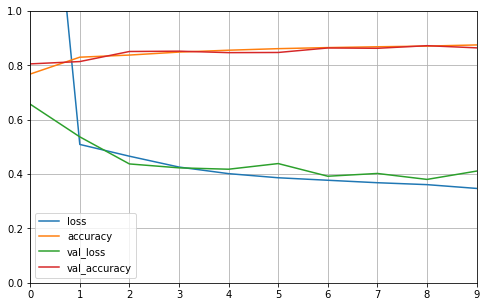

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)          # 网格设置
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)